<a href="https://colab.research.google.com/github/Kate-Strydom/cse450/blob/main/module3Boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the basic imports and dataset

In [1]:
import pandas as pd

housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')
housing.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1565930130,20141104T000000,4,3.25,3760,4675,2.0,0,0,3,...,2740,1020,2007,0,98038,47.3862,-122.048,3280,4033,429900.0
1,3279000420,20150115T000000,3,1.75,1460,7800,1.0,0,0,2,...,1040,420,1979,0,98023,47.3035,-122.382,1310,7865,233000.0
2,194000575,20141014T000000,4,1.00,1340,5800,1.5,0,2,3,...,1340,0,1914,0,98116,47.5658,-122.389,1900,5800,455000.0
3,2115510160,20141208T000000,3,1.75,1440,8050,1.0,0,0,3,...,1440,0,1985,0,98023,47.3187,-122.390,1790,7488,258950.0
4,7522500005,20140815T000000,2,1.50,1780,4750,1.0,0,0,4,...,1080,700,1947,0,98117,47.6859,-122.395,1690,5962,555000.0


All from here are extra information added to the original dataset and some transformations to the dates( years )

In [2]:
# download the income data

zip_code = pd.read_csv('https://raw.githubusercontent.com/carlosdgerez/machine_learning/main/mean_income_washington_by_zipcode.csv')
zip_code.head()



,zip_code,mean_income
0,98001,102586
1,98002,70945
2,98003,76753
3,98004,210129
4,98005,186020


In [3]:
# rename the columns as the one in clean data to use merge by this column
zip_code.rename(columns={'zip_code': 'zipcode'}, inplace = True)

In [5]:
# download the income data
# Price index is a variation index of the prices of homes in the area we are working with . 
# FROM https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index-Datasets.aspx#povol

price_index = pd.read_csv('https://raw.githubusercontent.com/carlosdgerez/machine_learning/main/price_index.csv')
price_index.head()

,zipcode,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base
0,98001,16.18,1175.72,378.94,255.89
1,98002,15.31,1061.13,424.05,263.15
2,98003,17.35,1241.23,393.20,274.01
3,98004,-10.87,1876.50,473.89,273.74
4,98005,-0.55,1646.14,467.74,288.62


In [6]:
import numpy as np

# Here I fill up 0 that represents not data with the mean of the columns
price_index =price_index.replace(0,np.nan)
price_index[['HPI with 1990 base', 'HPI with 2000 base']] = price_index[['HPI with 1990 base', 'HPI with 2000 base']].fillna(price_index[['HPI with 1990 base', 'HPI with 2000 base']].mean())



In [7]:
price_index

,zipcode,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base
0,98001,16.18,1175.72,378.940000,255.89
1,98002,15.31,1061.13,424.050000,263.15
2,98003,17.35,1241.23,393.200000,274.01
3,98004,-10.87,1876.50,473.890000,273.74
4,98005,-0.55,1646.14,467.740000,288.62
...,...,...,...,...,...
327,98944,13.04,326.13,444.598235,221.02
328,98947,18.94,232.82,444.598235,245.63
329,98948,14.70,329.81,444.598235,226.46
330,98951,3.64,291.78,444.598235,192.24


In [8]:
# more rich data that improve the model from Kate

zipcode = pd.read_csv('https://raw.githubusercontent.com/Kate-Strydom/cse450/main/notebooks/zipcode_washington.csv')

zipcode.head()

,zipcode,population,median_household_income
0,98001,31742,72540
1,98002,34240,44930
2,98003,45632,45563
3,98004,31254,100344
4,98005,17880,85639


In [9]:
#Changing date in the original set to be in the same format as the rest of the years features
import datetime
housing['date'] = pd.DatetimeIndex(housing['date']).year



In [10]:
# drop id
# droping the id from the original dataset since can be related to personal information start to generate a set to work with
clean_data = housing.drop(['id'], axis = 1)

In [11]:

# change date name to something more descriptive
clean_data.rename(columns={'date': 'sale_date'}, inplace=True)

In [13]:
# Use merge to get the data in the dataframe
new_clean_data = pd.merge(clean_data, zip_code, how= 'left', on= 'zipcode')
new_clean_data.head()

,sale_date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,mean_income
0,2014,4,3.25,3760,4675,2.0,0,0,3,8,...,1020,2007,0,98038,47.3862,-122.048,3280,4033,429900.0,134178
1,2015,3,1.75,1460,7800,1.0,0,0,2,7,...,420,1979,0,98023,47.3035,-122.382,1310,7865,233000.0,100910
2,2014,4,1.00,1340,5800,1.5,0,2,3,7,...,0,1914,0,98116,47.5658,-122.389,1900,5800,455000.0,151980
3,2014,3,1.75,1440,8050,1.0,0,0,3,8,...,0,1985,0,98023,47.3187,-122.390,1790,7488,258950.0,100910
4,2014,2,1.50,1780,4750,1.0,0,0,4,7,...,700,1947,0,98117,47.6859,-122.395,1690,5962,555000.0,166123


In [14]:
# This reorder can be done better in the final set, but since I worked in progression is a remainder of the original work that can be usefoul to test diferent sets in this same code.
# reorder the data to have the target price at the end
column_to_move = new_clean_data.pop("mean_income")

# insert column with insert(location, column_name, column_value)

new_clean_data.insert(19, "mean_income", column_to_move)


In [15]:
new_clean_data

,sale_date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,mean_income,price
0,2014,4,3.25,3760,4675,2.0,0,0,3,8,...,1020,2007,0,98038,47.3862,-122.048,3280,4033,134178,429900.0
1,2015,3,1.75,1460,7800,1.0,0,0,2,7,...,420,1979,0,98023,47.3035,-122.382,1310,7865,100910,233000.0
2,2014,4,1.00,1340,5800,1.5,0,2,3,7,...,0,1914,0,98116,47.5658,-122.389,1900,5800,151980,455000.0
3,2014,3,1.75,1440,8050,1.0,0,0,3,8,...,0,1985,0,98023,47.3187,-122.390,1790,7488,100910,258950.0
4,2014,2,1.50,1780,4750,1.0,0,0,4,7,...,700,1947,0,98117,47.6859,-122.395,1690,5962,166123,555000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2014,3,1.50,1000,6914,1.0,0,0,3,7,...,0,1947,0,98125,47.7144,-122.319,1000,6947,103336,378000.0
19996,2014,3,2.50,3087,5002,2.0,0,0,3,8,...,0,2014,0,98023,47.2974,-122.349,2927,5183,100910,399950.0
19997,2014,3,2.50,2120,4780,2.0,0,0,3,7,...,0,2004,0,98053,47.6810,-122.032,1690,2650,205610,575000.0
19998,2014,1,0.75,380,15000,1.0,0,0,3,5,...,0,1963,0,98168,47.4810,-122.323,1170,15000,83229,245000.0


In [16]:
# Use merge to get the data in the dataframe
new_clean_data2 = pd.merge(new_clean_data, price_index, how= 'left', on= 'zipcode')
new_clean_data2

,sale_date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,mean_income,price,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base
0,2014,4,3.25,3760,4675,2.0,0,0,3,8,...,47.3862,-122.048,3280,4033,134178,429900.0,14.75,1140.60,391.43,254.48
1,2015,3,1.75,1460,7800,1.0,0,0,2,7,...,47.3035,-122.382,1310,7865,100910,233000.0,16.22,1271.45,372.36,264.66
2,2014,4,1.00,1340,5800,1.5,0,2,3,7,...,47.5658,-122.389,1900,5800,151980,455000.0,5.44,2213.57,489.15,271.53
3,2014,3,1.75,1440,8050,1.0,0,0,3,8,...,47.3187,-122.390,1790,7488,100910,258950.0,16.22,1271.45,372.36,264.66
4,2014,2,1.50,1780,4750,1.0,0,0,4,7,...,47.6859,-122.395,1690,5962,166123,555000.0,8.18,2345.21,545.24,309.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2014,3,1.50,1000,6914,1.0,0,0,3,7,...,47.7144,-122.319,1000,6947,103336,378000.0,9.05,1985.76,475.04,296.13
19996,2014,3,2.50,3087,5002,2.0,0,0,3,8,...,47.2974,-122.349,2927,5183,100910,399950.0,16.22,1271.45,372.36,264.66
19997,2014,3,2.50,2120,4780,2.0,0,0,3,7,...,47.6810,-122.032,1690,2650,205610,575000.0,12.11,955.72,438.91,269.22
19998,2014,1,0.75,380,15000,1.0,0,0,3,5,...,47.4810,-122.323,1170,15000,83229,245000.0,13.58,1332.52,478.59,284.12


In [17]:
# reorder the data to have the target price at the end
column_to_move = new_clean_data2.pop("price")

# insert column with insert(location, column_name, column_value)

new_clean_data2.insert(24, "price", column_to_move)


In [18]:
# Use merge to get the data in the dataframe
new_clean_data3 = pd.merge(new_clean_data, zipcode, how= 'left', on= 'zipcode')

In [19]:
# reorder the data to have the target price at the end
column_to_move = new_clean_data3.pop("price")

# insert column with insert(location, column_name, column_value)

new_clean_data3.insert(22, "price", column_to_move)


From now down we start to check the models. The best parameters came fro cross validation in other code. We can test the original data (new_clean_data, and step by step the increase of performance adding more informatio by changing the code here. Instead of new_clean_data set new_clean_data2 or 3.

In [20]:
# get a training set: a X as with the features to relate and a y with the  target 
X = new_clean_data3.iloc[:,0:-1]
y = new_clean_data3.price


In [21]:
# Start spliting the data and import libraries

#import train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.30, random_state=1)


In [23]:
#  xgboost regresor
import xgboost
from sklearn import metrics as sm

# createn instance and fit the model

clf2 = xgboost.XGBRegressor(random_state=5, max_depth= 4, n_estimators= 900, learning_rate= 0.1, verbosity = 0, n_jobs = -1).fit(X_train, y_train)
y_pred = clf2.predict(X_test)

# This is how to generate a regresion report ( for regresion )
print("Mean absolute error in dollars=", round(
    sm.mean_absolute_error(y_test, y_pred), 2))
print("Mean squared error =", round(
    sm.mean_squared_error(y_test, y_pred), 2))
print("Median absolute error =", round(
    sm.median_absolute_error(y_test, y_pred), 2))
print("Explain variance score =", round(
    sm.explained_variance_score(y_test, y_pred), 2))
print("R2 score =", round( sm.r2_score(y_test, y_pred),4))
print( "ROOT Mean squared error in dollars = ", 
    round(sm.mean_squared_error(y_test, y_pred, squared=False 
)))


Mean absolute error in dollars= 61911.21
Mean squared error = 11884782245.04
Median absolute error = 36993.66
Explain variance score = 0.91
R2 score = 0.9109
ROOT Mean squared error in dollars =  109017


The diference between the nean absolute result and the root squared may be for the high variation of the target values. Mean absolute error is less sensitive to the outliers in the performance scoring.

In [110]:
clf2.get_params(deep=True)

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 4,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 900,
 'n_jobs': -1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 5,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 0}

In [62]:
import seaborn as sns

In [92]:
perc_residual = [(y_pred - y_test)/y_test]

df_res = pd.DataFrame (perc_residual).transpose()
df_res.columns = ['perc_residual']
print(df_res)

       perc_residual
11456      -0.010124
16528      -0.112734
3253        0.481825
18614      -0.007869
1544        0.130743
...              ...
12696      -0.104755
14288      -0.184341
18768      -0.023925
3950        0.205275
8871        0.154889

[6000 rows x 1 columns]


Text(0.5, 1.0, 'Histogram of the Percent Change of Residual')

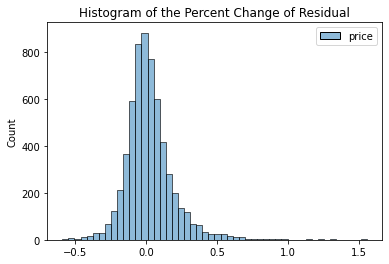

In [96]:
p =sns.histplot(data=perc_residual, bins=50)
p.set_title("Histogram of the Percent Change of Residual")

In [98]:
df_res.describe()

,perc_residual
count,6000.000000
mean,0.022462
std,0.174788
min,-0.592462
25%,-0.075058
50%,-0.000627
75%,0.089777
max,1.553113


In [100]:
# merge residual into the data

# Use merge to get the data in the dataframe
dataframe = pd.concat([y_test, df_res], axis=1)
dataframe

,price,perc_residual
11456,575000.0,-0.010124
16528,565997.0,-0.112734
3253,230000.0,0.481825
18614,550000.0,-0.007869
1544,515000.0,0.130743
...,...,...
12696,329950.0,-0.104755
14288,464500.0,-0.184341
18768,217000.0,-0.023925
3950,210000.0,0.205275


In [109]:
extreme = dataframe[(dataframe['perc_residual'] > 1.5)].value_counts()
extreme.head()

price     perc_residual
110000.0  1.553113         1
150000.0  1.544293         1
dtype: int64

In [24]:


#  EVALUATION OF THE MODEL 

#Predict the response for test dataset


# Features importances in a model this block can be run with diferent models to compare


feat_imports = (pd.DataFrame({"feature names": X_train.columns,
                              "importances": clf2.feature_importances_})
                .sort_values("importances", ascending=False))

feat_imports.reset_index(drop= True, inplace= True)



In [25]:
# This presentation is basic, can be improved

import altair as alt
alt.themes.enable('fivethirtyeight')
feat_imports['percents'] = round((feat_imports.importances * 100).astype(float),2)
alt.Chart(feat_imports.head(10)).mark_bar().encode(
    alt.X("importances", axis=alt.Axis(format='%', labelColor='#D35400', titleColor='#af3f38' ), title='Percent of relevance in the model'),
    alt.Y('feature names',sort='-x', title= '',axis=alt.Axis(labelColor='#af3f38')),
    tooltip=('percents')).properties(title= 'Which features are more relevant in price predictions.').configure_title(
        color='#ff998a
    )

alt.Chart(...)

In [31]:
# This presentation is basic, can be improved

import altair as alt
alt.themes.enable('fivethirtyeight')
feat_imports['percents'] = round((feat_imports.importances * 100).astype(float),2)
alt.Chart(feat_imports.head(10)).mark_bar().encode(
    alt.X("importances", axis=alt.Axis(format='%' ), title='Percent of relevance in the model'),
    alt.Y('feature names',sort='-x', title= '',axis=alt.Axis()),
    tooltip=('percents')).properties(title= 'Importance Features for House Price Prediction').configure_title(
    )

alt.Chart(...)

In [33]:
# Cross validation of the model with r2 as scoring parameter. Takes at least 1 minute to run all cicles.
from sklearn.model_selection import cross_val_score


scores = cross_val_score(clf2, X, y, scoring='r2', cv=10, n_jobs=-1)
scores.mean()

0.9017964559035805

In [ ]:
scores

array([0.89105787, 0.87251651, 0.91508486, 0.90902371, 0.89509317,
       0.91009678, 0.92123603, 0.90110821, 0.90374584, 0.89900158])

# Holdout set predictions and saved model

Preprocessing ( has to repeat all the process of preparation of the dataset)
clf2 is the model to use.

In [ ]:


housing2 = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test.csv')
housing2.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [ ]:
#Changing date in the original set to be in the same format as the rest of the years features

housing2['date'] = pd.DatetimeIndex(housing2['date']).year



In [ ]:
# drop id
# droping the id from the original dataset since can be related to personal information start to generate a set to work with
clean_data = housing2.drop(['id'], axis = 1)

In [ ]:

# change date name to something more descriptive
clean_data.rename(columns={'date': 'sale_date'}, inplace=True)

In [ ]:
# Use merge to get the data in the dataframe
new_clean_data = pd.merge(clean_data, zip_code, how= 'left', on= 'zipcode')
new_clean_data.head()

,sale_date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,mean_income
0,2014,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,106748
1,2014,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,154113
2,2014,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,198704
3,2015,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,127177
4,2014,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,165241


In [ ]:
# Use merge to get the data in the dataframe
new_clean_data2 = pd.merge(new_clean_data, price_index, how= 'left', on= 'zipcode')
new_clean_data2.head()

,sale_date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,mean_income,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base
0,2014,4,2.25,2070,8893,2.0,0,0,4,8,...,98058,47.4388,-122.162,2390,7700,106748,16.29,1276.09,399.83,272.33
1,2014,5,3.00,2900,6730,1.0,0,0,5,8,...,98115,47.6784,-122.285,2370,6283,154113,8.01,2355.72,503.62,293.32
2,2014,4,2.50,3770,10893,2.0,0,2,3,11,...,98006,47.5646,-122.129,3710,9685,198704,8.29,1930.56,456.35,301.55
3,2015,3,3.50,4560,14608,2.0,0,2,3,12,...,98034,47.6995,-122.228,4050,14226,127177,12.37,2053.31,490.05,320.14
4,2014,3,2.50,2550,5376,2.0,0,0,3,9,...,98052,47.6647,-122.083,2250,4050,165241,8.18,1988.39,493.01,318.29


In [ ]:
# Use merge to get the data in the dataframe
new_clean_data2 = pd.merge(new_clean_data, price_index, how= 'left', on= 'zipcode')
new_clean_data2.columns

Index(['sale_date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'mean_income', 'Annual Change (%)',
       'HPI', 'HPI with 1990 base', 'HPI with 2000 base'],
      dtype='object')

In [ ]:
# Use merge to get the data in the dataframe
new_clean_data3 = pd.merge(new_clean_data, zipcode, how= 'left', on= 'zipcode')

In [ ]:
new_clean_data3.columns

Index(['sale_date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'mean_income', 'population',
       'median_household_income'],
      dtype='object')